# Cambiar el fondo de una imagen

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
%cd /content/drive/MyDrive/Computer_Vision

/content/drive/MyDrive/Computer_Vision


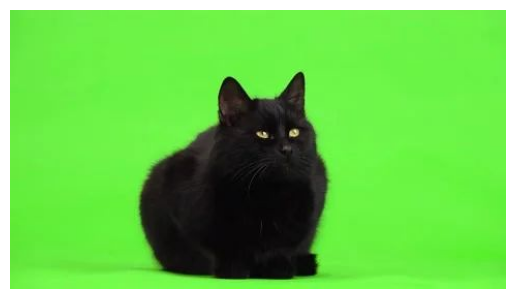

In [ ]:
# Imagen original
imagen = cv2.imread('cat.jpg')

matriz = np.array(imagen)

import matplotlib.pyplot as plt
plt.imshow(matriz[:, :, ::-1], cmap="gray")
plt.axis('off')
plt.show()

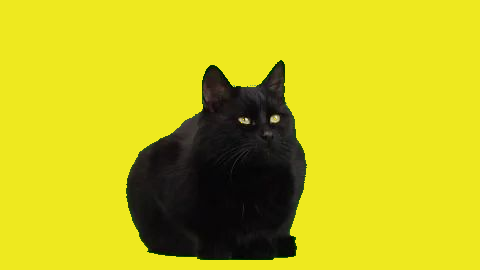

In [ ]:
# Imagen modificada
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

verde_bajo = np.array([10, 110, 90])  # Umbral inferior del verde en formato HSV
verde_alto = np.array([90, 255, 255]) # Umbral superior del verde en formato HSV

imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

mascara_verde = cv2.inRange(imagen_hsv, verde_bajo, verde_alto)

imagen_rgb[mascara_verde != 0] = [238, 233, 31]

cv2_imshow(cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2BGR))

# Operadores de punto

## Brillo y contraste

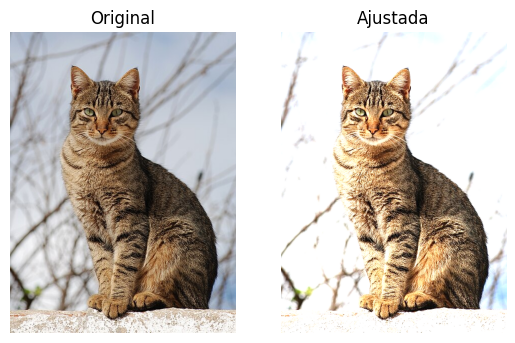

In [ ]:
img = cv2.imread('Cat_November_2010-1a.png')

alfa = 1.5  # Ganancia (contraste)
beta = 0.2  # Sesgo (brillo)

# Aplicar la transformación
imagen_ajustada = cv2.convertScaleAbs(img, alpha=alfa, beta=beta)

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(imagen_ajustada, cv2.COLOR_BGR2RGB)), plt.title('Ajustada')
plt.axis('off')
plt.show()

## Image Matting

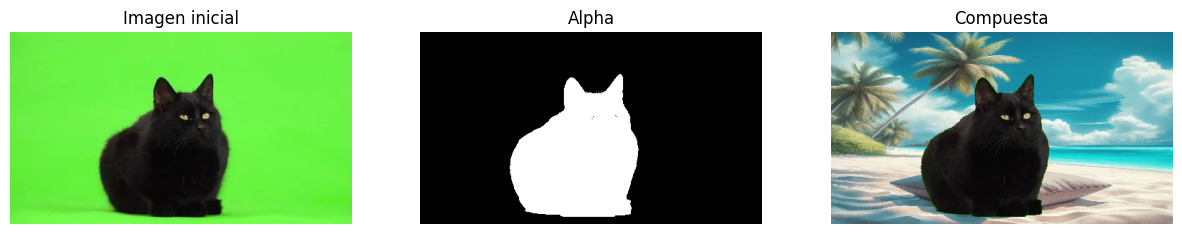

In [ ]:
# Lee la imagen del gato y del nuevo fondo
img_cat = cv2.imread('cat.jpg')
img_background = cv2.imread('Fondo5.jpg')

# Asegúrate de que ambas imágenes tengan las mismas dimensiones
img_background = cv2.resize(img_background, (img_cat.shape[1], img_cat.shape[0]))

# Define el rango de colores de verde en HSV
lower_green = np.array([10, 110, 90])
upper_green = np.array([90, 255, 255])

# Convierte la imagen del gato a HSV
hsv = cv2.cvtColor(img_cat, cv2.COLOR_BGR2HSV)

# Crea una máscara para el color verde
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invierte la máscara
mask_inv = cv2.bitwise_not(mask)

# Aplica la máscara a la imagen del gato
img_cat_fg = cv2.bitwise_and(img_cat, img_cat, mask=mask_inv)

# Aplica la máscara inversa al fondo
img_background_fg = cv2.bitwise_and(img_background, img_background, mask=mask)

# Fusiona el gato con el nuevo fondo
result = cv2.add(img_cat_fg, img_background_fg)

# Función para mostrar las imágenes juntas con sus títulos
def show_images_with_titles(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# Lista de imágenes y títulos
images = [img_cat, mask_inv, result]
titles = ["Imagen inicial", "Alpha", "Compuesta"]

# Muestra las imágenes juntas con sus títulos
show_images_with_titles(images, titles)

# Operador Sobel

## Dirección Y

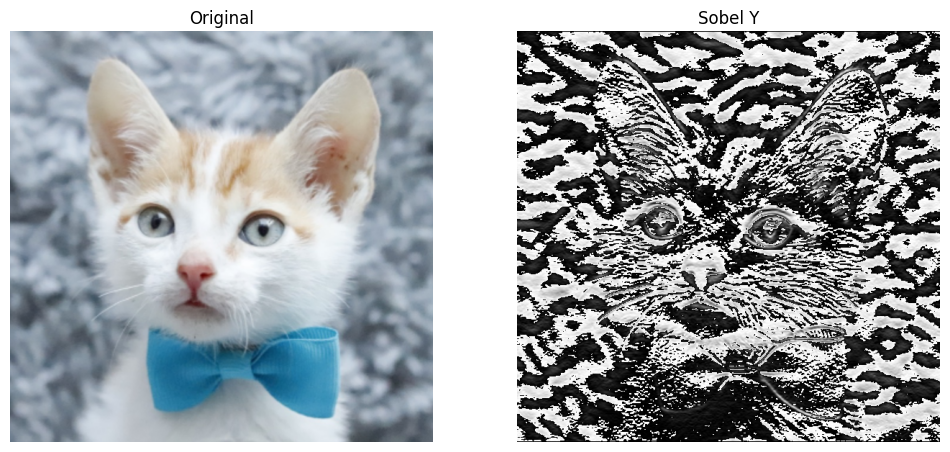

In [ ]:
# Cargar la imagen
original_image = cv2.imread("cat4.png")

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Escalar la imagen en el rango [0, 1]
gray_image = gray_image / 255.0

# Definir el filtro Sobel en dirección Y
sobel_y_filter = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# Aplicar el filtro Sobel en dirección Y
filtered_image = cv2.filter2D(gray_image, -1, sobel_y_filter)

# Escalar los valores de la imagen filtrada al rango [0, 255]
filtered_image = np.uint8(filtered_image * 255.0)

# Mostrar la imagen resultante

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')
plt.show()

## Dirección X

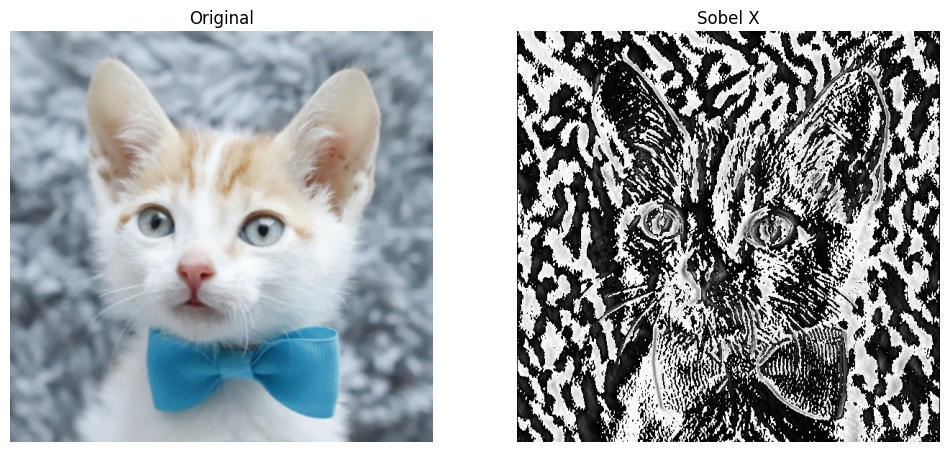

In [ ]:
# Cargar la imagen
original_image = cv2.imread("cat4.png")

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Escalar la imagen en el rango [0, 1]
gray_image = gray_image / 255.0

# Definir el filtro Sobel en dirección X
sobel_x_filter = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Aplicar el filtro Sobel en dirección X
filtered_image = cv2.filter2D(gray_image, -1, sobel_x_filter)

# Escalar los valores de la imagen filtrada al rango [0, 255]
filtered_image = np.uint8(filtered_image * 255.0)

# Mostrar la imagen resultante
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Sobel X")
plt.axis('off')
plt.show()

## Gradient magnitude

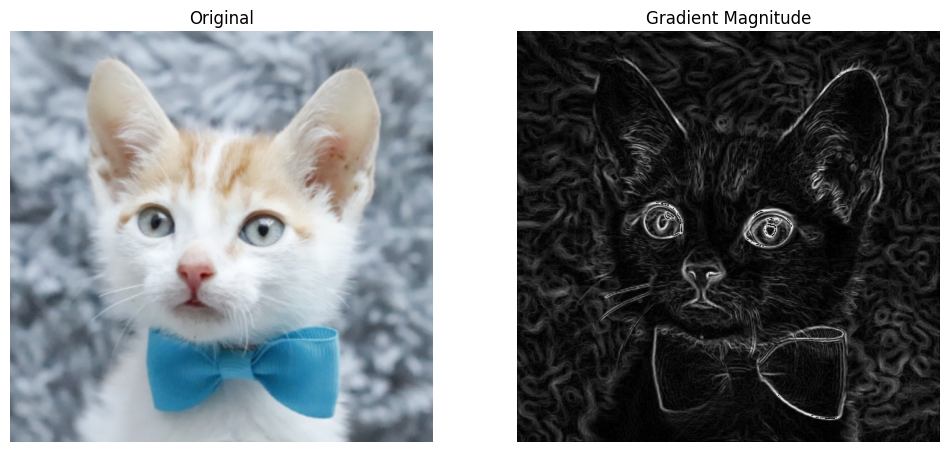

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen
original_image = cv2.imread("cat4.png")

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Escalar la imagen en el rango [0, 1]
gray_image = gray_image / 255.0

# Definir el filtro Sobel en dirección X
sobel_x_filter = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Definir el filtro Sobel en dirección Y
sobel_y_filter = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# Aplicar los filtros Sobel en dirección X y en dirección Y
filtered_image_x = cv2.filter2D(gray_image, -1, sobel_x_filter)
filtered_image_y = cv2.filter2D(gray_image, -1, sobel_y_filter)

# Calcular la magnitud del gradiente
magnitude_image = np.sqrt(filtered_image_x ** 2 + filtered_image_y ** 2)

# Escalar los valores de la imagen de magnitud del gradiente al rango [0, 255]
magnitude_image = np.uint8(magnitude_image * 255.0)

# Mostrar la imagen original y la imagen resultante de la magnitud del gradiente
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(magnitude_image, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')
plt.show()